In [1]:
# importing libraries for data handling and analysis
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm


In [2]:
#importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [3]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [4]:
# importing misceallenous libraries
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse
# ip = get_ipython()
# ip.register_magics(jupyternotify.JupyterNotifyMagics)

In [5]:
# Read Excel file
df_sourcefile = pd.read_csv('/home/splash/Downloads/churn222.csv')
print("Shape of dataframe is: {}".format(df_sourcefile.shape))


Shape of dataframe is: (89636, 9)


In [6]:
df_HR = df_sourcefile.copy()

In [7]:
# Dataset columns
df_HR.columns

Index(['order_date', 'category_name', 'product_name', 'order_sequence',
       'revenue', 'units', 'customer_id', 'order_id', 'Exited'],
      dtype='object')

In [8]:
# Dataset header
df_HR.head()

,order_date,category_name,product_name,order_sequence,revenue,units,customer_id,order_id,Exited
0,03-Jan-14,Photo Books,12x12 Memory Book,1,54.54,1,91660572,917000000000000,No
1,03-Jan-14,Photo Books,Memorabilia Pocket,1,1.99,0,91660572,917000000000000,No
2,03-Jan-14,Photo Books,Premium Content,1,4.99,0,91660572,917000000000000,No
3,16-May-15,Photo Books,8x11 Classic Book,2,61.58,2,91660572,917000000000000,No
4,16-May-15,Photo Books,Premium Content,2,7.19,0,91660572,917000000000000,No


In [9]:
df_HR.columns.to_series().groupby(df_HR.dtypes).groups

{dtype('int64'): Index(['order_sequence', 'units', 'customer_id', 'order_id'], dtype='object'),
 dtype('float64'): Index(['revenue'], dtype='object'),
 dtype('O'): Index(['order_date', 'category_name', 'product_name', 'Exited'], dtype='object')}

In [10]:
# Columns datatypes and missign values
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89636 entries, 0 to 89635
Data columns (total 9 columns):
order_date        89636 non-null object
category_name     89636 non-null object
product_name      89636 non-null object
order_sequence    89636 non-null int64
revenue           89636 non-null float64
units             89636 non-null int64
customer_id       89636 non-null int64
order_id          89636 non-null int64
Exited            89636 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 6.2+ MB


In [11]:
df_HR.describe()

,order_sequence,revenue,units,customer_id,order_id
count,89636.000000,89636.000000,89636.000000,8.963600e+04,8.963600e+04
mean,4.456123,19.523892,22.709637,4.951769e+07,4.528585e+14
std,6.331564,35.721153,62.664103,2.879722e+07,3.075390e+14
min,1.000000,-206.150000,0.000000,8.656000e+03,6.736700e+04
25%,1.000000,3.935735,1.000000,2.427273e+07,1.780000e+14
50%,2.000000,7.990000,1.000000,4.898846e+07,4.440000e+14
75%,5.000000,23.380000,13.000000,7.419158e+07,7.170000e+14
max,93.000000,2761.990000,2974.000000,9.999470e+07,1.000000e+15


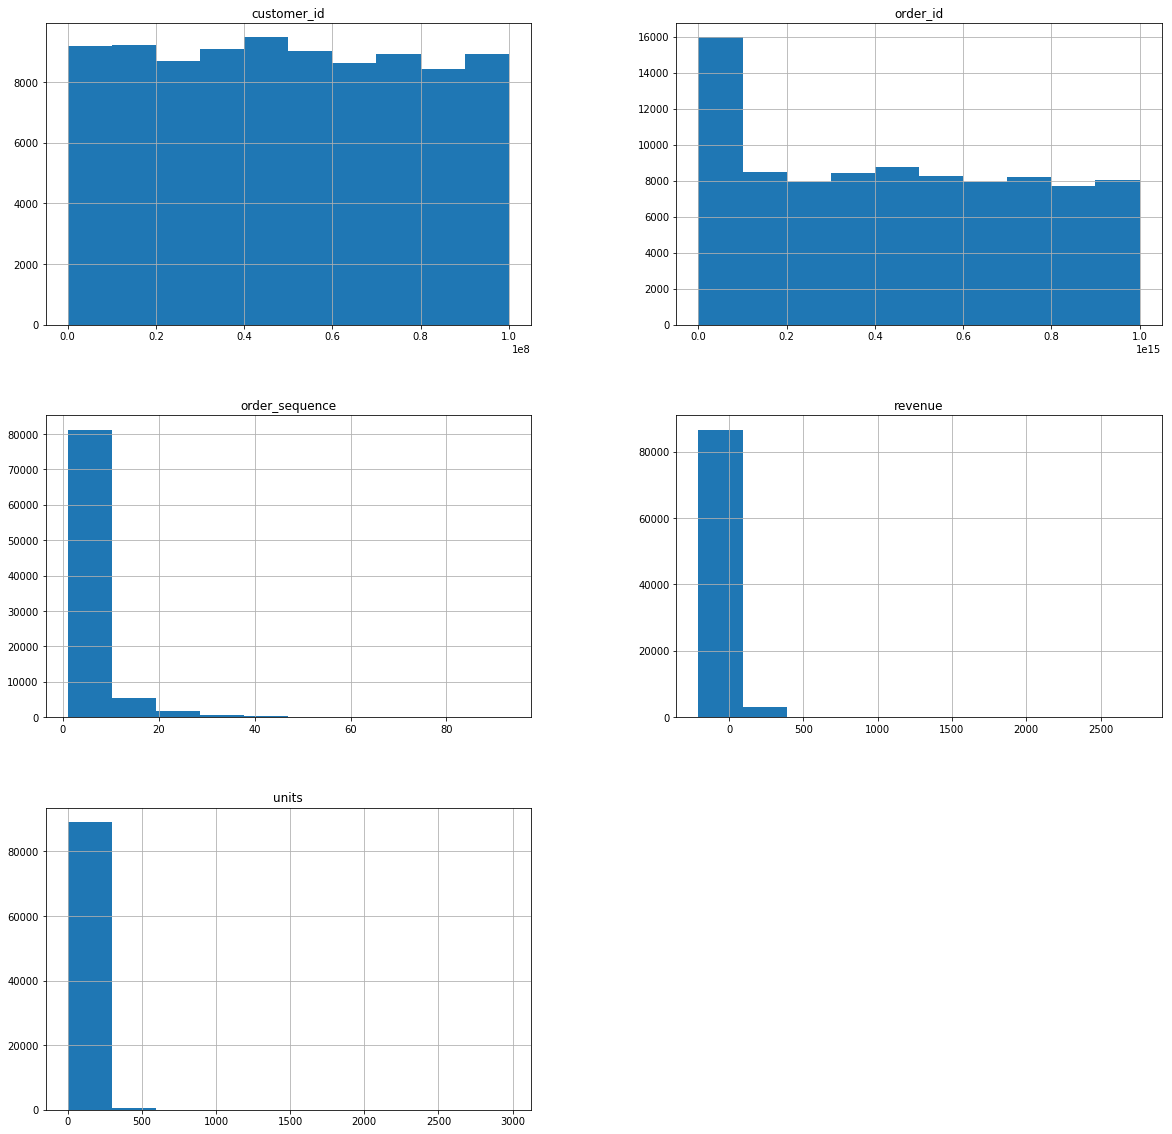

In [12]:

df_HR.hist(figsize=(20,20))
plt.show()

In [13]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
df_HR['Exited'].value_counts()


No     81708
Yes     7928
Name: Exited, dtype: int64

In [14]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df_HR[df_HR['Exited'] == 'No'].shape[0] / df_HR.shape[0]*100,
    df_HR[df_HR['Exited'] == 'Yes'].shape[0] / df_HR.shape[0]*100))

Percentage of Current Employees is 91.2% and of Ex-employees is: 8.8%


In [15]:
df_HR['Exited'].iplot(kind='hist', xTitle='Exited',
                         yTitle='count', title='Attrition Distribution')

In [16]:
# Find correlations with the target and sort
df_HR_trans = df_HR.copy()
df_HR_trans['Target'] = df_HR_trans['Exited'].apply(
    lambda x: 0 if x == 'No' else 1)
df_HR_trans = df_HR_trans.drop(
    ['Exited'], axis=1)
correlations = df_HR_trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 customer_id    0.008666
order_id       0.026391
units          0.050298
revenue        0.070178
Target         1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 order_sequence   -0.170032
customer_id       0.008666
order_id          0.026391
units             0.050298
revenue           0.070178
Name: Target, dtype: float64


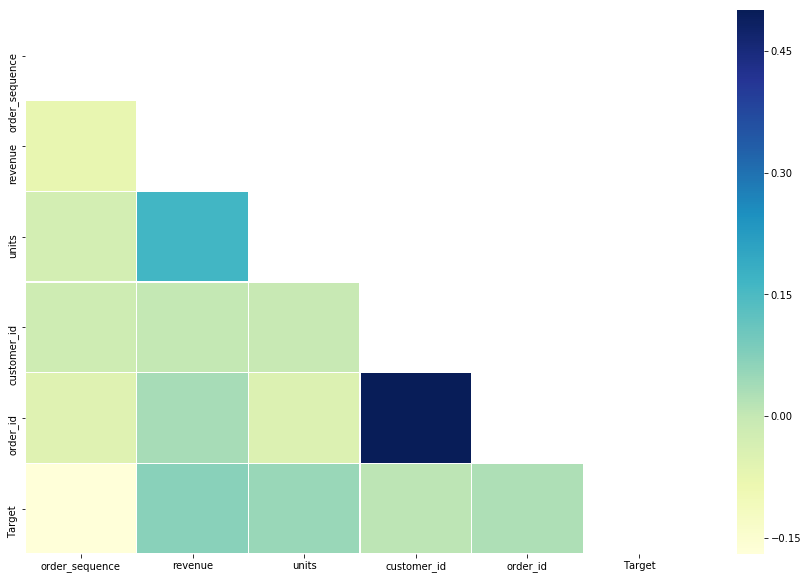

In [17]:
# Calculate correlations
corr = df_HR_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [19]:
print(df_HR.shape)
df_HR.head()

(89636, 9)


,order_date,category_name,product_name,order_sequence,revenue,units,customer_id,order_id,Exited
0,03-Jan-14,Photo Books,12x12 Memory Book,1,54.54,1,91660572,917000000000000,No
1,03-Jan-14,Photo Books,Memorabilia Pocket,1,1.99,0,91660572,917000000000000,No
2,03-Jan-14,Photo Books,Premium Content,1,4.99,0,91660572,917000000000000,No
3,16-May-15,Photo Books,8x11 Classic Book,2,61.58,2,91660572,917000000000000,No
4,16-May-15,Photo Books,Premium Content,2,7.19,0,91660572,917000000000000,No


In [20]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_HR.columns[1:]:
    if df_HR[col].dtype == 'object':
        if len(list(df_HR[col].unique())) <= 2:
            le.fit(df_HR[col])
            df_HR[col] = le.transform(df_HR[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

1 columns were label encoded.


In [21]:
# convert rest of categorical variable into dummy
df_HR = pd.get_dummies(df_HR, drop_first=True)

In [22]:
print(df_HR.shape)
df_HR.head()

(89636, 913)


,order_sequence,revenue,units,customer_id,order_id,Exited,order_date_01-Apr-15,order_date_01-Aug-14,order_date_01-Aug-15,order_date_01-Dec-14,order_date_01-Dec-15,order_date_01-Feb-14,order_date_01-Feb-15,order_date_01-Jan-14,order_date_01-Jan-15,order_date_01-Jul-14,order_date_01-Jul-15,order_date_01-Jun-14,order_date_01-Jun-15,order_date_01-Mar-14,order_date_01-Mar-15,order_date_01-May-14,order_date_01-May-15,order_date_01-Nov-14,order_date_01-Nov-15,order_date_01-Oct-14,order_date_01-Oct-15,order_date_01-Sep-14,order_date_01-Sep-15,order_date_02-Apr-14,order_date_02-Apr-15,order_date_02-Aug-14,order_date_02-Aug-15,order_date_02-Dec-14,order_date_02-Dec-15,order_date_02-Feb-14,order_date_02-Feb-15,order_date_02-Jan-14,order_date_02-Jan-15,order_date_02-Jul-14,order_date_02-Jul-15,order_date_02-Jun-14,order_date_02-Jun-15,order_date_02-Mar-14,order_date_02-Mar-15,order_date_02-May-14,order_date_02-May-15,order_date_02-Nov-14,order_date_02-Nov-15,order_date_02-Oct-14,order_date_02-Oct-15,order_date_02-Sep-14,order_date_02-Sep-15,order_date_03-Apr-14,order_date_03-Apr-15,order_date_03-Aug-14,order_date_03-Aug-15,order_date_03-Dec-14,order_date_03-Dec-15,order_date_03-Feb-14,order_date_03-Feb-15,order_date_03-Jan-14,order_date_03-Jan-15,order_date_03-Jul-14,order_date_03-Jul-15,order_date_03-Jun-14,order_date_03-Jun-15,order_date_03-Mar-14,order_date_03-Mar-15,order_date_03-May-14,order_date_03-May-15,order_date_03-Nov-14,order_date_03-Nov-15,order_date_03-Oct-14,order_date_03-Oct-15,order_date_03-Sep-14,order_date_03-Sep-15,order_date_04-Apr-14,order_date_04-Apr-15,order_date_04-Aug-14,order_date_04-Aug-15,order_date_04-Dec-14,order_date_04-Dec-15,order_date_04-Feb-14,order_date_04-Feb-15,order_date_04-Jan-14,order_date_04-Jan-15,order_date_04-Jul-14,order_date_04-Jul-15,order_date_04-Jun-14,order_date_04-Jun-15,order_date_04-Mar-14,order_date_04-Mar-15,order_date_04-May-14,order_date_04-May-15,order_date_04-Nov-14,order_date_04-Nov-15,order_date_04-Oct-14,order_date_04-Oct-15,order_date_04-Sep-14,order_date_04-Sep-15,order_date_05-Apr-14,order_date_05-Apr-15,order_date_05-Aug-14,order_date_05-Aug-15,order_date_05-Dec-14,order_date_05-Dec-15,order_date_05-Feb-14,order_date_05-Feb-15,order_date_05-Jan-14,order_date_05-Jan-15,order_date_05-Jul-14,order_date_05-Jul-15,order_date_05-Jun-14,order_date_05-Jun-15,order_date_05-Mar-14,order_date_05-Mar-15,order_date_05-May-14,order_date_05-May-15,order_date_05-Nov-14,order_date_05-Nov-15,order_date_05-Oct-14,order_date_05-Oct-15,order_date_05-Sep-14,order_date_05-Sep-15,order_date_06-Apr-14,order_date_06-Apr-15,order_date_06-Aug-14,order_date_06-Aug-15,order_date_06-Dec-14,order_date_06-Dec-15,order_date_06-Feb-14,order_date_06-Feb-15,order_date_06-Jan-14,order_date_06-Jan-15,order_date_06-Jul-14,order_date_06-Jul-15,order_date_06-Jun-14,order_date_06-Jun-15,order_date_06-Mar-14,order_date_06-Mar-15,order_date_06-May-14,order_date_06-May-15,order_date_06-Nov-14,order_date_06-Nov-15,order_date_06-Oct-14,order_date_06-Oct-15,order_date_06-Sep-14,order_date_06-Sep-15,order_date_07-Apr-14,order_date_07-Apr-15,order_date_07-Aug-14,order_date_07-Aug-15,order_date_07-Dec-14,order_date_07-Dec-15,order_date_07-Feb-14,order_date_07-Feb-15,order_date_07-Jan-14,order_date_07-Jan-15,order_date_07-Jul-14,order_date_07-Jul-15,order_date_07-Jun-14,order_date_07-Jun-15,order_date_07-Mar-14,order_date_07-Mar-15,order_date_07-May-14,order_date_07-May-15,order_date_07-Nov-14,order_date_07-Nov-15,order_date_07-Oct-14,order_date_07-Oct-15,order_date_07-Sep-14,order_date_07-Sep-15,order_date_08-Apr-14,order_date_08-Apr-15,order_date_08-Aug-14,order_date_08-Aug-15,order_date_08-Dec-14,order_date_08-Dec-15,order_date_08-Feb-14,order_date_08-Feb-15,order_date_08-Jan-14,order_date_08-Jan-15,order_date_08-Jul-14,order_date_08-Jul-15,order_date_08-Jun-14,order_date_08-Jun-15,order_date_08-Mar-14,order_date_08-Mar-15,order_date_08-May-14,order_date_08-May-15,order_date_08-Nov-14,order_date_08-Nov-15,order_date_08-O

In [23]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df_HR.columns)
HR_col.remove('Exited')
for col in HR_col:
    df_HR[col] = df_HR[col].astype(float)
    df_HR[[col]] = scaler.fit_transform(df_HR[[col]])
df_HR['Exited'] = pd.to_numeric(df_HR['Exited'], downcast='float')
df_HR.head()

,order_sequence,revenue,units,customer_id,order_id,Exited,order_date_01-Apr-15,order_date_01-Aug-14,order_date_01-Aug-15,order_date_01-Dec-14,order_date_01-Dec-15,order_date_01-Feb-14,order_date_01-Feb-15,order_date_01-Jan-14,order_date_01-Jan-15,order_date_01-Jul-14,order_date_01-Jul-15,order_date_01-Jun-14,order_date_01-Jun-15,order_date_01-Mar-14,order_date_01-Mar-15,order_date_01-May-14,order_date_01-May-15,order_date_01-Nov-14,order_date_01-Nov-15,order_date_01-Oct-14,order_date_01-Oct-15,order_date_01-Sep-14,order_date_01-Sep-15,order_date_02-Apr-14,order_date_02-Apr-15,order_date_02-Aug-14,order_date_02-Aug-15,order_date_02-Dec-14,order_date_02-Dec-15,order_date_02-Feb-14,order_date_02-Feb-15,order_date_02-Jan-14,order_date_02-Jan-15,order_date_02-Jul-14,order_date_02-Jul-15,order_date_02-Jun-14,order_date_02-Jun-15,order_date_02-Mar-14,order_date_02-Mar-15,order_date_02-May-14,order_date_02-May-15,order_date_02-Nov-14,order_date_02-Nov-15,order_date_02-Oct-14,order_date_02-Oct-15,order_date_02-Sep-14,order_date_02-Sep-15,order_date_03-Apr-14,order_date_03-Apr-15,order_date_03-Aug-14,order_date_03-Aug-15,order_date_03-Dec-14,order_date_03-Dec-15,order_date_03-Feb-14,order_date_03-Feb-15,order_date_03-Jan-14,order_date_03-Jan-15,order_date_03-Jul-14,order_date_03-Jul-15,order_date_03-Jun-14,order_date_03-Jun-15,order_date_03-Mar-14,order_date_03-Mar-15,order_date_03-May-14,order_date_03-May-15,order_date_03-Nov-14,order_date_03-Nov-15,order_date_03-Oct-14,order_date_03-Oct-15,order_date_03-Sep-14,order_date_03-Sep-15,order_date_04-Apr-14,order_date_04-Apr-15,order_date_04-Aug-14,order_date_04-Aug-15,order_date_04-Dec-14,order_date_04-Dec-15,order_date_04-Feb-14,order_date_04-Feb-15,order_date_04-Jan-14,order_date_04-Jan-15,order_date_04-Jul-14,order_date_04-Jul-15,order_date_04-Jun-14,order_date_04-Jun-15,order_date_04-Mar-14,order_date_04-Mar-15,order_date_04-May-14,order_date_04-May-15,order_date_04-Nov-14,order_date_04-Nov-15,order_date_04-Oct-14,order_date_04-Oct-15,order_date_04-Sep-14,order_date_04-Sep-15,order_date_05-Apr-14,order_date_05-Apr-15,order_date_05-Aug-14,order_date_05-Aug-15,order_date_05-Dec-14,order_date_05-Dec-15,order_date_05-Feb-14,order_date_05-Feb-15,order_date_05-Jan-14,order_date_05-Jan-15,order_date_05-Jul-14,order_date_05-Jul-15,order_date_05-Jun-14,order_date_05-Jun-15,order_date_05-Mar-14,order_date_05-Mar-15,order_date_05-May-14,order_date_05-May-15,order_date_05-Nov-14,order_date_05-Nov-15,order_date_05-Oct-14,order_date_05-Oct-15,order_date_05-Sep-14,order_date_05-Sep-15,order_date_06-Apr-14,order_date_06-Apr-15,order_date_06-Aug-14,order_date_06-Aug-15,order_date_06-Dec-14,order_date_06-Dec-15,order_date_06-Feb-14,order_date_06-Feb-15,order_date_06-Jan-14,order_date_06-Jan-15,order_date_06-Jul-14,order_date_06-Jul-15,order_date_06-Jun-14,order_date_06-Jun-15,order_date_06-Mar-14,order_date_06-Mar-15,order_date_06-May-14,order_date_06-May-15,order_date_06-Nov-14,order_date_06-Nov-15,order_date_06-Oct-14,order_date_06-Oct-15,order_date_06-Sep-14,order_date_06-Sep-15,order_date_07-Apr-14,order_date_07-Apr-15,order_date_07-Aug-14,order_date_07-Aug-15,order_date_07-Dec-14,order_date_07-Dec-15,order_date_07-Feb-14,order_date_07-Feb-15,order_date_07-Jan-14,order_date_07-Jan-15,order_date_07-Jul-14,order_date_07-Jul-15,order_date_07-Jun-14,order_date_07-Jun-15,order_date_07-Mar-14,order_date_07-Mar-15,order_date_07-May-14,order_date_07-May-15,order_date_07-Nov-14,order_date_07-Nov-15,order_date_07-Oct-14,order_date_07-Oct-15,order_date_07-Sep-14,order_date_07-Sep-15,order_date_08-Apr-14,order_date_08-Apr-15,order_date_08-Aug-14,order_date_08-Aug-15,order_date_08-Dec-14,order_date_08-Dec-15,order_date_08-Feb-14,order_date_08-Feb-15,order_date_08-Jan-14,order_date_08-Jan-15,order_date_08-Jul-14,order_date_08-Jul-15,order_date_08-Jun-14,order_date_08-Jun-15,order_date_08-Mar-14,order_date_08-Mar-15,order_date_08-May-14,order_date_08-May-15,order_date_08-Nov-14,order_date_08-Nov-15,order_date_08-O

In [24]:
print('Size of Full Encoded Dataset: {}'. format(df_HR.shape))

Size of Full Encoded Dataset: (89636, 913)


In [25]:
# assign the target to a new dataframe and convert it to a numerical feature
target = df_HR['Exited'].copy()

In [26]:
type(target)

pandas.core.series.Series

In [27]:
# let's remove the target feature and redundant features from the dataset
df_HR.drop(['Exited', 'order_id', ], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(df_HR.shape))

Size of Full dataset is: (89636, 911)


In [54]:
indices = df_HR.index.values 

In [55]:
X_train, X_test, indices_train, indices_test = train_test_split(df_HR,
                                                    indices,
                                                    test_size=0.25,
                                                    random_state=7)  

y_train, y_test = target[indices_train], target[indices_test]

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (67227, 911)
Number transactions y_train dataset:  (67227,)
Number transactions X_test dataset:  (22409, 911)
Number transactions y_test dataset:  (22409,)


In [56]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.91 (0.00)


In [57]:
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=1.9909999999999997, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 1.9909999999999997}
best score: 0.9108950193490619


Text(0.5, 257.44, 'Predicted label')

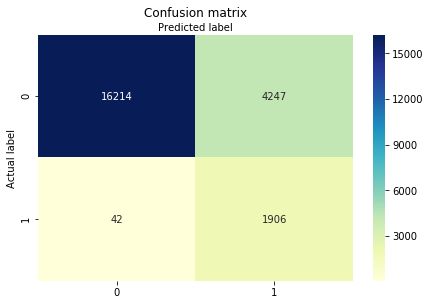

In [58]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [59]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 80.86


In [60]:
# Classification report for the optimised Log Regression
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88     20461
         1.0       0.31      0.98      0.47      1948

    accuracy                           0.81     22409
   macro avg       0.65      0.89      0.68     22409
weighted avg       0.94      0.81      0.85     22409



In [61]:
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs1 = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs1) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.912


In [65]:
y_hats2 = log_opt.predict_proba(df_HR)

In [66]:
print(y_hats2)

[[2.14509945e-01 7.85490055e-01]
 [9.99120584e-01 8.79415834e-04]
 [9.99764361e-01 2.35638607e-04]
 ...
 [1.57687047e-01 8.42312953e-01]
 [1.37734795e-01 8.62265205e-01]
 [1.24420424e-01 8.75579576e-01]]


In [68]:
df_sourcefile["Exited"] = y_hats2
df_sourcefile[["customer_id","Exited"]].to_csv('submission.csv', index=False)